In [1]:
import cPickle
import numpy as np
import os
from scipy.misc import imread
import random
import keras

Using TensorFlow backend.


In [2]:
def load_CIFAR_one(filename):
    with open(filename, 'rb') as f:
        datadict = cPickle.load(f)
        X = datadict['data']
        Y = datadict['labels']
        #X = np.transpose(np.reshape(X,(-1,32,32,3), order='F'),
        #                axes=(0,2,1,3)) #order batch,x,y,color
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(PATH):
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(PATH, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_one(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs) #entrenamiento
    Ytr = np.concatenate(ys) #entrenamiento
    del X, Y
    Xt, Yt = load_CIFAR_one(os.path.join(PATH, 'test_batch')) #pruebas
    limit_sup= random.randint(5000,50000)
    limit_inf= limit_sup - random.randint(0,5000)
    Xu= Xtr[limit_inf:limit_sup,0:3072] #conjunto de Validación
    Yu = Ytr[limit_inf:limit_sup] #conjunto de Validación
    return Xtr, Ytr, Xt, Yt, Xu, Yu

#carga de matrices
Xtr, Ytr, Xt, Yt, Xv, Yv = load_CIFAR10('../data/')

In [3]:
print Xtr.shape

(50000, 3072)


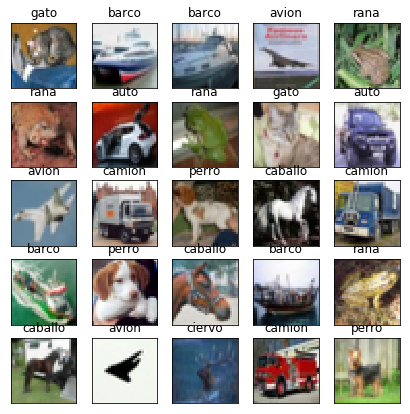

In [4]:
import matplotlib.pyplot as plt
clases = ['avion','auto','pajaro','gato','ciervo',
          'perro','rana','caballo','barco','camion']
# dibujar imagenes
X= np.transpose(np.reshape(Xt,(-1,32,32,3), order='F'),
                        axes=(0,2,1,3)) #order batch,x,y,color
fig = plt.figure(figsize=(7,7))
for i in range(25):
    fig.add_subplot(5,5,(i+1),xticks=[], yticks=[])
    plt.title("{}".format(clases[Yt[i]]))
    plt.imshow(X[i])
plt.show()

In [5]:
Xtr=Xtr/255.0
Xt=Xt/255.0

In [6]:
num_classes=10

x_train = Xtr.reshape((Xtr.shape[0],32,32,3))
#x_train = x_train.transpose([0, 2, 3, 1]) #only if 'tf' dim-ordering is to be used
x_test= Xt.reshape((Xt.shape[0],32,32,3))
#x_test= x_test.transpose([0, 2, 3, 1])#remove if 'th' dim-ordering is to be used
y_train = keras.utils.to_categorical(Ytr, num_classes)
y_test = keras.utils.to_categorical(Yt, num_classes)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

model = Sequential()
model.add(Convolution2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [9]:
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
batch_size= 500
def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train,batch_size=batch_size,epochs=25,
    validation_data=(x_test, y_test),shuffle=True,callbacks=[lrate], verbose= True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 209s - loss: 0.0902 - acc: 0.0925 - val_loss: 0.0901 - val_acc: 0.0914
Epoch 2/25
50000/50000 [==============================] - 217s - loss: 0.0901 - acc: 0.0955 - val_loss: 0.0901 - val_acc: 0.0967
Epoch 3/25
50000/50000 [==============================] - 208s - loss: 0.0901 - acc: 0.1008 - val_loss: 0.0900 - val_acc: 0.1052
Epoch 4/25
50000/50000 [==============================] - 208s - loss: 0.0900 - acc: 0.1073 - val_loss: 0.0900 - val_acc: 0.1124
Epoch 5/25
50000/50000 [==============================] - 208s - loss: 0.0900 - acc: 0.1134 - val_loss: 0.0900 - val_acc: 0.1157
Epoch 6/25
50000/50000 [==============================] - 208s - loss: 0.0899 - acc: 0.1168 - val_loss: 0.0899 - val_acc: 0.1188
Epoch 7/25
50000/50000 [==============================] - 208s - loss: 0.0899 - acc: 0.1211 - val_loss: 0.0899 - val_acc: 0.1239
Epoch 8/25
50000/50000 [=======================